In [ ]:
# {
#   "reviewerID": "A2SUAM1J3GNN3B",
#   "asin": "0000013714",
#   "reviewerName": "J. McDonald",
#   "helpful": [2, 3],
#   "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
#   "overall": 5.0,
#   "summary": "Heavenly Highway Hymns",
#   "unixReviewTime": 1252800000,
#   "reviewTime": "09 13, 2009"
# }

6

In [7]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

p =10000
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
        if i%p == 0:
            print(i,'th row: ', d)
        
    return pd.DataFrame.from_dict(df, orient='index')

In [95]:
org_data = parse('../data/item_dedup.json.gz')

In [37]:
# length distribution check
len_summaries = [len(d['summary'].split()) for d in org_data]

In [51]:
# max, min, distribution
import pandas as pd
len_summaries_df = pd.DataFrame(len_summaries)
len_summaries_df.describe()

,0
count,8.267712e+07
mean,4.064714e+00
std,2.807172e+00
min,0.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,5.000000e+00
max,5.800000e+01


In [53]:
import pickle 
pickle.dump(len_summaries_df, open('len_summaries_df.pkl', 'wb'))

In [54]:
import numpy as np
hist,bins=np.histogram(len_summaries_df,bins=50)
print(hist)

[ 8992762 20531140 14410285 11300536  8248811  6122519  7020053  1959297
  1353488   913687   575518   376750   411383   116093    83449    62720
    48535    41768    55430    18034    13230     9141     5904     3425
     1761     1104      131       62       16       19       13       11
       10        4        2        5        2        7        1        1
        1        1        1        1        1        1        1        0
        0        2]


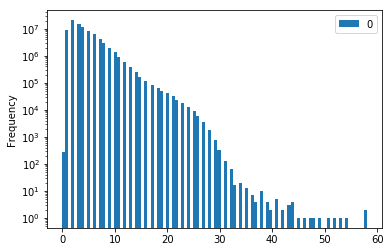

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(len_summaries_df, bins=100)

len_summaries_df.plot.hist(bins=100)
plt.yscale('log')
plt.show()

In [100]:
no =0

i = 0
df = {}

for d in org_data:
    df[i] = d
    i += 1    
#     print(type(d))
    print(i,'summary',len(d['summary'].split()))
        
    no +=1
    if no>=5:
        break
        
data = pd.DataFrame.from_dict(df, orient='index')

1 summary 3
2 summary 3
3 summary 3
4 summary 5
5 summary 1


In [101]:
df

{0: {'asin': '0000013714',
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'Heavenly Highway HymnsI ordered this hymnal because I learned to read shaped note music when I was a teenager. I play piano but do not sing. I am 85 years old. This hymnal has mostof the songs I have learned over the years. It was exactly what I wanted and needed.It was in good condition and the price was right. I purchased this book from Amazon.',
  'reviewTime': '10 16, 2012',
  'reviewerID': 'A3BED5QFJWK88M',
  'reviewerName': 'jimedd',
  'summary': 'Heavenly Highway Hymns',
  'unixReviewTime': 1350345600},
 1: {'asin': '0000013714',
  'helpful': [2, 3],
  'overall': 5.0,
  'reviewText': 'I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!',
  'reviewTime': '09 13, 2009',
  'reviewerID': 'A2SUAM1J3GNN3B',
  '

In [69]:
print(data.reviewText[0])
print('summary:', data.summary[0])
data[['asin','reviewText','summary']]

You may laugh, but I have found that Otherland volumes 1-4 are poor at picking up debris around the house.  I once spilled some cornflakes on the floor, and foolishly thought that I could clean it up by dropping &#34;City of Golden Shadows&#34; on it.  Not only did it not clean, it managed to make things worse by fragmenting the cornflakes into smaller and smaller pieces.  I did what any normal person would do: I stacked the other books on top, hoping that the combined power would whisk the cornflakes away to the technological wonderland that is Otherland.  No such results.Bin Otherland Empty, on the other hand, works like magic.  If you hook it up to a powerful enough motor, you can banish those cornflakes to the land of wind and ghosts.  The downside is that it's pretty light reading, but given the young adult trend these days it's following the light reading trend that literature is headed for these days.It's recommended that you get through the previous volume though (&#34;Hoover E

,asin,reviewText,summary
0,0000029831,"You may laugh, but I have found that Otherland...",The superior cleanser
1,0000029831,Do not try and vacuum the dust. That's impossi...,Very deep and thought provoking.
2,0000029831,What if Dread had come out victorious and left...,WHAT IF....?


In [29]:
print(len(data.summary[0].split()))
data.summary[0].split()

5


['Listing', 'is', 'all', 'screwed', 'up']

In [ ]:
['reviewerID': 'A10TK8OL2NJ1FU', 'asin': '0380797178', 'reviewerName': 'Jasmine', 'helpful': [4, 5], 'reviewText': "Well, Poppy and Erith are going to tell Ragweed's parents that he died, so on their way they meet Rye, who just so happens to be Ragweed's brother he is out seasrching for Ragweed, and then they break the news to him that Ragweed died, which actually might be a not so bad thing, because for Rye being second best in his family was a way of life they liked Ragweed better, but now would be a perfect chance for Rye to prove himself, I could tell you what happens, but you'll just have to read the book!.............!", 'overall': 5.0, 'summary': 'ANOTHER ONE!!!', 'unixReviewTime': 1043971200, 'reviewTime': '01 31, 2003']

In [8]:
df = getDF('../data/item_dedup.json.gz')

10000 th row:  {'reviewerID': 'A31058CO8X7LQN', 'asin': '000224053X', 'reviewerName': 'atr1688 "atr1688"', 'helpful': [2, 14], 'reviewText': 'It would take to many time to explain all the reasons why i loved this and the two following books. If you like hard sci-fi its a must read book.', 'overall': 5.0, 'summary': 'Best Science- Fiction ever red', 'unixReviewTime': 1106784000, 'reviewTime': '01 27, 2005'}
20000 th row:  {'reviewerID': 'AYE6KHD4A9CJN', 'asin': '0005019281', 'reviewerName': 'Kevin Barnett "KD Barnett"', 'helpful': [0, 0], 'reviewText': "I first saw this movie as a kid in the late 70's. I never forgot and when i found it on dvd i could not resist. It brought just as much enjoyment now as then. I like the twist on a classic with an American version.", 'overall': 4.0, 'summary': 'The Fonz does Scrooge', 'unixReviewTime': 1261526400, 'reviewTime': '12 23, 2009'}
30000 th row:  {'reviewerID': 'AQ5U1DAQLGKK1', 'asin': '0006550436', 'reviewerName': 'Lily', 'helpful': [0, 0], '

110000 th row:  {'reviewerID': 'A1EOZJW1OPR01', 'asin': '0007447868', 'reviewerName': 'Karen Miller', 'helpful': [22, 33], 'reviewText': "While I absolutely believe that there is no 'right' or 'wrong' response to a book, because it's all just personal opinion, I'm taken aback by some of the hostility I'm seeing here.If you went to see a play, would  you complain the story wasn't finished at the end of the first act? No. There's an interval and then there's a second act, and then there's the end. So okay, this story has more than 2 acts. By the end it will have, maybe, 7. So it's not really fair to say 'these characters aren't important' or 'this was just a bridge' or 'we didn't get to the end' ...  because until we do reach the end, we can't tell.I believe Martin is the single greatest fantasy writer of our time. I think he will go down in history as one of the greatest, full stop. Was I frustrated at the long time between books 3 and 4? You'd better believe it. Am I sorry that some of

230000 th row:  {'reviewerID': 'A28I5ZYRQ58VGD', 'asin': '0060282983', 'reviewerName': 'gwen wall', 'helpful': [0, 0], 'reviewText': 'The world needs to love one another again just as the characters in this story did!  Charlotte teaches us the true meaning of giving and love.', 'overall': 5.0, 'summary': 'A Wonderful Love Story', 'unixReviewTime': 1402444800, 'reviewTime': '06 11, 2014'}
240000 th row:  {'reviewerID': 'AE14CDBIN1KYA', 'asin': '0060392886', 'reviewerName': 'B. M. Ballard "Book Lover"', 'helpful': [0, 0], 'reviewText': 'This book was fantastic I loved the whole thing and read it in about 2 days. I would have liked to hear from Tommy Lee more as I found him to be the funniest and most interesting to read. All in all an awesome book that deserves 5 stars!!', 'overall': 5.0, 'summary': "Rockin' Book", 'unixReviewTime': 1163203200, 'reviewTime': '11 11, 2006'}
250000 th row:  {'reviewerID': 'A1US8UAPHMFBKW', 'asin': '0060509546', 'reviewerName': 'Gayle "brighttyger"', 'helpf

360000 th row:  {'reviewerID': 'A2TX179XAT5GRP', 'asin': '0060739592', 'reviewerName': 'TeensReadToo "Eat. Drink. Read. Be Merrier."', 'helpful': [10, 10], 'reviewText': 'Twelve-year-old Fern McAllister is the black sheep of her family, set apart by pale skin that blisters after moments in the sun and dark black hair in a family of blondes. Her strange sensitivity to light, and seeming ability to communicate with the family dog, are secondary concerns to the kids at her middle school who tease her for having an absent father. Despite gaining herself the nickname "freaky Fern," she leads a generally happy life, thanks to her mother\'s caring and her twinbrother Sam\'s friendship.But one day in the middle of English, Fern simply disappears. No one can find her; no one has seen her leave the room, much less her desk. Unbeknownst to her classmates, Fern has somehow managed to teleport to Pirate Cove, her favorite part of a nearby beach. Frightened and unsure of how she got there, Fern trie

410000 th row:  {'reviewerID': 'A2Q20HP871VSKW', 'asin': '0060820942', 'reviewerName': 'JerseyTomato', 'helpful': [21, 21], 'reviewText': "I cannot say enough wonderful things about this cookbook.  People have mentioned the beautiful photos and yes, they are certainly there.  The writing helps to weave a spell about the recipes.  You are not just making a soup, but the soup her aunt used to make when...The recipes will knock your socks off.  The roasted tomato tart is worth the price of the book.  My book club was blown away by the bluberry tart.  A gluten intolerant guest was thrilled with Gateau Lawrence.  (Flourless chocolate.  Easy, intense, and will make you a legend among your friends).  The soups are excellent too.  Oh yes, and the cabbage pie (galette) I made just because it sounded so weird, that was wonderful too.  The recipes seem to 'work' if you know what I mean.  You may choose to reduce the butter and make adjustments, but they turn out beautifully as written.One complai

540000 th row:  {'reviewerID': 'A1NWPOFCB9C7IL', 'asin': '0061093092', 'reviewerName': 'ReasonableGoatPerson', 'helpful': [0, 0], 'reviewText': 'Lawyer is a 7-letter word in my vocabulary, so color me shocked when I started reading Lily White, with a lawyer as its main character, and I was actually liking Ms White, not cursing her; nor imagining creative & painful ways in which she could be killed off, but wishing her a long and happy life. Surprise!The story is told in alternating chapters: one chapter in "the present", where Lily (known as Lee) is working as lawyer for a conman accused of murdering one of his marks; and then one in "the past", that tells Lee\'s life story, from her parents\' marriage, her subsequent birth, up until close to the time of the present-day story. Forth and back it goes.From the get-go, there are intimations of where the conman story is going, and really it\'s just a matter of how it plays out. Still, even despite knowing, I couldn\'t wait to find out what

670000 th row:  {'reviewerID': 'AY6L3PPCYAUS0', 'asin': '0061568228', 'reviewerName': 'Emrys R. Lloyd-Roberts', 'helpful': [10, 36], 'reviewText': 'This book starts with the premise that we do not know anything about the original gospels, now forming part of the new Testament, and then goes on to form a theological view based on what he images those original texts say. There are no facts about these gospels, only assumptions and conjecture.If you want a book about religion without reason and logic, this is your book.', 'overall': 1.0, 'summary': 'Salvation', 'unixReviewTime': 1347580800, 'reviewTime': '09 14, 2012'}
680000 th row:  {'reviewerID': 'ADFS4PIEY14G6', 'asin': '0061628018', 'reviewerName': 'Barbara N. Bybee "barbara_bybee         6867 ...', 'helpful': [1, 1], 'reviewText': "Excellent book....I'm from Utah and Warren Jeffs is in prison.....Yay,  Well, written.  Happy to see this intelligent girl is out of his clutches.", 'overall': 5.0, 'summary': 'Elissa Wall story.', 'unixR

800000 th row:  {'reviewerID': 'A1Q50CMX1G68LS', 'asin': '0061965804', 'reviewerName': 'cb', 'helpful': [3, 3], 'reviewText': 'Kind of an Ice Station Zebra,The Thing,meets an episode of x-files redux.The hero and heroine are seriously annoying.The tough-girl professor with the rabid anti-gun,anti military attitude gets old fast. As does her constant whining about things like a multi-million dollar heavy equipment elevator not being safe for her kid and complaining when someone opens a helicopter window because her kid might catch a draft.Coupled with asking if the real motive for the expedition is to allow "corporations" to rape the continent.Its all just a little too much for me.Our "hero" spelunker from Austrailia quickly realizes that the quickest way to professor moms heart is through the kid and makes every attempt to assure that he makes him his "little buddy". All the while complaining that the Military is destroying the "environment".Some might like it but......yeah, I\'m sendi

860000 th row:  {'reviewerID': 'A38RLKRBJOPTBW', 'asin': '0062024027', 'reviewerName': 'Autumn', 'helpful': [0, 0], 'reviewText': "LOVE.THIS. BOOK. If you are planning on seeing the new Divergent movie, don't until you read the book. Half of the movie won't make sense if you don't. I recommend this book to anyone 10-100.", 'overall': 5.0, 'summary': 'Just Another Divergent Fan', 'unixReviewTime': 1402963200, 'reviewTime': '06 17, 2014'}
870000 th row:  {'reviewerID': 'A18FKLN6W1O39B', 'asin': '0062026542', 'reviewerName': 'Lindsey Maxwell', 'helpful': [1, 1], 'reviewText': "I am trying to encourage everyone I know to read this series! No one listens to me. Rae Carson is unpredictable so I really didn't know how it was going to end. I just want everyone to pick up this series and read it. It was amazing. I giggled like a school girl and whooped through out this series. Loved the Hector chapters. The first time the chaper heading said &#34;Hector&#34; I believe I said out loud, &#34; Oh 

1000000 th row:  {'reviewerID': 'A3N4YAHBI0JRNF', 'asin': '0062217208', 'reviewerName': 'Ellen Horan "DOMAGRACE"', 'helpful': [9, 15], 'reviewText': "There is nothing more frightening than being wrongly accused. In a perfect world, one would simply correct the error and move on. What makes this a gripping book and a horror tale of sorts, is that Amanda Knox became trapped in an international legal nightmare. She was a middle class American student, who ended up in solitary confinement and imprisoned with hardened criminals for over four years for a murder that no rational person would think she committed. How that day to day reality unfolded is the basis of this book, up to her release. The who what and why it happened is still a mystery. Why did the Italian prosecutor hate her? Was the DNA evidence tampered with to frame her? Why did the legal system fail her? Where WAS the American consulate at any time, and early on in her ordeal? Where was the American State Dept? There are lots of

1140000 th row:  {'reviewerID': 'A1NATT3PN24QWY', 'asin': '0071373365', 'reviewerName': 'Rolf Dobelli "getAbstract"', 'helpful': [5, 15], 'reviewText': "Mark J. Barrenechea, a senior vice president for applications development at Oracle Corp., describes how to transform a company by using a range of e-business applications. He draws on Oracle's success at changing its business by using the Internet and networking to interconnect employees, customers and suppliers. Barrenechea's useful roadmap shows how your company can apply these methods to coordinate, systematize and streamline operations. He demonstrates how other companies - including General Motors, Boeing and Microsoft - use e-business networking. He writes in a straightforward style without jargon and maintains a keen focus on operations, making this book a wealth of practical knowledge. Of course, that same focus might limit the book's appeal to executives without an interest in operations technology and to other mainstream rea

1240000 th row:  {'reviewerID': 'A2KFOGTNOM42UH', 'asin': '0073376450', 'reviewerName': 'Deezer "Deezer"', 'helpful': [1, 3], 'reviewText': 'Great condition and quick service  - I was very pleased with this vendor in purchasing this book.  The whole process was quick and easy', 'overall': 5.0, 'summary': 'Great service', 'unixReviewTime': 1315180800, 'reviewTime': '09 5, 2011'}
1250000 th row:  {'reviewerID': 'A37M8Z2H5W7762', 'asin': '0073527963', 'reviewerName': 'Yeed', 'helpful': [0, 0], 'reviewText': 'The book is lengthy and is everything you expect from a criminal justice book with some added bonuses such as little included stories in the chapter to help the reader to better understand the concepts and chapter as well as the vocabulary of the text book.', 'overall': 4.0, 'summary': 'Criminal justice', 'unixReviewTime': 1360972800, 'reviewTime': '02 16, 2013'}
1260000 th row:  {'reviewerID': 'AC9ZMFQB5BAV6', 'asin': '0077514742', 'reviewerName': 'Nicole', 'helpful': [0, 0], 'review

1340000 th row:  {'reviewerID': 'A3ETKB8439BBQR', 'asin': '0123694736', 'reviewerName': 'T. Cunningham "Rb Man"', 'helpful': [1, 1], 'reviewText': "If all of the Apple frameworks were explained as well as CoreGraphics/Quartz is in this book, life would be so much better for independent programmers. I am not writing code in XCode, but one where I need to port calls to custom classes. This book has helped me so much. I have not located the link on the publisher's site (maybe I'm just missing it), but my only complaint (a very minor one) would be that they don't have a contact email for the authors to report errata or thank them.Well written, to the point, good code examples and does not duplicate the Apple documents. Covers Carbon and Cocoa calls. The chapters on axial and radial shadings were the most helpful for me.", 'overall': 5.0, 'summary': 'Excellent Book', 'unixReviewTime': 1179014400, 'reviewTime': '05 13, 2007'}
1350000 th row:  {'reviewerID': 'AF0W0VJRVCE99', 'asin': '01302080

1440000 th row:  {'reviewerID': 'ABYT6AXJ1TEO9', 'asin': '0138419418', 'reviewerName': 'Vivien', 'helpful': [0, 0], 'reviewText': "This is my textbook.  but i don't like it very much.  i am the beginner of the JavaScript, this book even doesn't help me at all.  there are a lot of things had not talked about it before it pop up, it just suddenly appear before your eyes.  I always get lost because of that.", 'overall': 1.0, 'summary': 'If your are the beginner, this is not your choice !!!!!!!', 'unixReviewTime': 1016409600, 'reviewTime': '03 18, 2002'}
1450000 th row:  {'reviewerID': 'A3RKEF64X6KZ17', 'asin': '0140053204', 'reviewerName': 'C. Lewis', 'helpful': [0, 0], 'reviewText': 'Easy read, lots of cute one-liners and a little wisdom.  Interesting to read about his Southern encounters in the 1960s.', 'overall': 4.0, 'summary': 'Nice read', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
1460000 th row:  {'reviewerID': 'A1Y8CLNTCLR04O', 'asin': '0140098275', 'reviewerName':

1520000 th row:  {'reviewerID': 'A1T17LMQABMBN5', 'asin': '0140298479', 'reviewerName': 'CoffeeGurl', 'helpful': [8, 8], 'reviewText': "This novel was a great read, it was hilarious.  May I say that I think it's funnier than the original. Of course, it is not very different from the original -- she is still trying to quit smoking and trying to lose  weight, but the heroine seems a little more together this time  around.There was a setback, the whole death threat thing, for a minute  there I thought I was reading a mystery novel (I hate mystery novels) --  but other than that, it is great!  I was cracking up on the subway train on  my way to work this morning while I read the chapter in which she was  interviewing Colin Firth -- the actor who played Mr. Darcy in Pride and  Prejudice. The people on the train were staring at me, but I couldn't help  it, it was too funny.I know it sounds insane but I do wish Miss Fielding  writes another Bridget Jones novel. I would happily buy all the Bri

1600000 th row:  {'reviewerID': 'A1ZWGRWZV428LV', 'asin': '014104022X', 'reviewerName': 'Brian', 'helpful': [0, 0], 'reviewText': 'A wonderful story full of many aspects of the many facets of a hard and difficult journey. Warm strong emotional.', 'overall': 5.0, 'summary': 'A heart warming story', 'unixReviewTime': 1382486400, 'reviewTime': '10 23, 2013'}
1610000 th row:  {'reviewerID': 'A1ZPO4Y05SPIWW', 'asin': '0141187425', 'helpful': [16, 28], 'reviewText': "Drawing upon the work of Michel Foucault, Edward Said claims that Western ideas of the `Orient' are not based upon objective facts but are created through academic and cultural `discourses' which serve to promote Western imperialism - often despite `liberal' intentions.This mythical `East' is the antithesis of the West, a negative or inversion of the 'Occident' which is used to define *both* in binary opposition to each other, and to facilitate the political and domination of the East.However in order to demonstrate the existenc

1690000 th row:  {'reviewerID': 'A14JH0ILQ660IT', 'asin': '0142196193', 'reviewerName': 'Free Polazzo', 'helpful': [5, 8], 'reviewText': 'I really like these books and the way they are written.  The question and answer format make it easy to use it as a "reference" and also allows one to read a few pages at a time.The question and answer format is also wonderful because alot of what Judiasm is about is questions.  "Question Everything" must have been the eleventh commandment.What is missing are important topics.  I wrote to the author in 1996 and he was kind enough to repy to my question.  I wrote:"I enjoy reading your book . . .  However, there is a major omission that I need to ask about.  Why is the subject of War (and violence) not covered?Your biography says you were/are active as a military chaplain.  I imagine that your role as chaplain and advisor to chaplains would put you in a great position to speak to the question of war and Jewish Law.Perhaps your wrote about this in anoth

1780000 th row:  {'reviewerID': 'A23ORR2740NR2U', 'asin': '0143037838', 'reviewerName': 'Greg Beesch "GregB"', 'helpful': [25, 34], 'reviewText': 'The tone of arrogance and condescension really diminish what would otherwise be a good autobiographical case study of growing a hobby/skill into a successful brand. Critical self assessment is sometimes subordinated to over emotive passages and screeds about Chouinard\'s take social and economic trends.  Some of the more interesting aspects of forming company goals and culture were lost amid a general tone of contempt for what Chouinard considers `the business world\'.  The good stuff is there, you just have to get past the maverick chest thumping and "I am a reluctant businessman and I run my business better without old and tired business practices and paradigms. . . like profit".Two things were rather galling. First, the first sentence "No young kid growing up ever dreams of becoming a businessman." Well, sorry, a lot of kids actually do, 

1890000 th row:  {'reviewerID': 'A1FPVKQVRRF2ZA', 'asin': '0143170104', 'reviewerName': 'Amy Senk "Read it, Loved it"', 'helpful': [0, 1], 'reviewText': "The Girl Who Played With Fire is better than the first book -- and I adored the first book, so that's saying something. In this second book of the trilogy, we learn about Lisbeth -- everything from what she did right after the first book ended to what made her the person she became -- in a complicated, intricately plotted story.The opening scenes with Lisbeth enjoying new riches on the beach didn't seem to add much to the story, but once she was home in Europe, wham! It was like a roller coaster taking off, with journalists doing their thing, sex traders doing their thing, killers doing their thing and Lisbeth doing her thing.The story, told through various characters' perspectives, is gripping and entertaining. And the ending is great -- answering questions but raising new ones.When is book three coming out in the U.S.??", 'overall':

1990000 th row:  {'reviewerID': 'ATB5DQ3SVQ27G', 'asin': '0195014766', 'reviewerName': 'Charles Bukowski "buk1818"', 'helpful': [0, 8], 'reviewText': 'this book is in excellent shape.  BUT, I ordered it on May 5th , 2009, and did not receive it until June 1st, 2009.  That is way way way way too long to get my book, and I will not order from this customer again.', 'overall': 4.0, 'summary': 'The Art of War, by Sun Tzu, Thomas Cleary used book', 'unixReviewTime': 1244246400, 'reviewTime': '06 6, 2009'}
2000000 th row:  {'reviewerID': 'A1VE8QL8RJ9SCU', 'asin': '0195103092', 'reviewerName': 'tyler zarubin', 'helpful': [0, 7], 'reviewText': 'upon pondering motives for writing this everlasting existential review, i have prostrated that this novel portrays one tipple of a protagonist who through the use of foretasting one is able to percieve ebony in the  circumstances faced by Capitu.  a most separatist prognosis is in order for  this linear novel.', 'overall': 5.0, 'summary': 'an insightful

2080000 th row:  {'reviewerID': 'A2FC00C1NFO59J', 'asin': '0201632160', 'reviewerName': 'Leo Free "Art Scents"', 'helpful': [3, 4], 'reviewText': "I first saw a picture or two on some program to download desktop photos.  I followed some info cuz I was captivated by the Alice pictures.  I discovered Robyn's journey, story and this story book.  I considered buying a used one, but decided to get a new one.  I just love the whole of it and so appreciate  the author not only taking the journey but sharing it with the rest of us.  Even if some of the sharing was against her original plans.  Thanks Robyn.  Your journey touches deeply in inexplicable ways.", 'overall': 5.0, 'summary': 'e Intimacy of Inspiration', 'unixReviewTime': 1171152000, 'reviewTime': '02 11, 2007'}
2090000 th row:  {'reviewerID': 'A3705CPTAQ8BQV', 'asin': '020502940X', 'reviewerName': 'sagarcia_1', 'helpful': [1, 1], 'reviewText': 'Buying the Kindle version, I now have access to it on my MacBook Pro, iPad, and iPhone. Si

2220000 th row:  {'reviewerID': 'A4AU217EBQ47L', 'asin': '0271021195', 'reviewerName': 'D. Moore "Clouseau"', 'helpful': [2, 2], 'reviewText': "A thoughtfully detailed and entertaining narrative with lots of captivating photos of the key people and places of Lincoln's visits to the Commonwealth.  I also liked the appendix which provided guidance on how to follow and experience the Lincoln Trail. I'm not a Lincoln expert, so the accounts of his experiences here were new to me and fascinating to read... but that also means my rating is just a reflection of how much I liked this book, not a comparison to other books about Mr. Lincoln. It is unquestionably well-written.", 'overall': 5.0, 'summary': 'Fascinating,  highly detailed, great pictures!', 'unixReviewTime': 1011139200, 'reviewTime': '01 16, 2002'}
2230000 th row:  {'reviewerID': 'A2IO5NPN61YVWZ', 'asin': '0292716265', 'reviewerName': 'William R. Robertson', 'helpful': [0, 0], 'reviewText': 'I thoroughly enjoyed "One Ranger" and thi

2320000 th row:  {'reviewerID': 'AFZG8ESZAYAYA', 'asin': '0307265757', 'reviewerName': 'Alexander R. Seals', 'helpful': [1, 2], 'reviewText': 'Very descriptive, yet very entertaining, story of Pixar.  This book is told from an unbiased point of view and is engaging from beginning to end.  Definitely recommend for any fan of Pixar!', 'overall': 5.0, 'summary': 'Engaging and Entertaining!', 'unixReviewTime': 1230249600, 'reviewTime': '12 26, 2008'}
2330000 th row:  {'reviewerID': 'A2P5XNVLKUIWR', 'asin': '0307268934', 'reviewerName': 'Ann H Smith', 'helpful': [0, 1], 'reviewText': 'This adventure is blended with  both history and anthropology.  It is informative and compelling.  I do not recommend it for those who only like romance novels or are squemish. It is very informative about an area many of us know little about.', 'overall': 5.0, 'summary': 'GREAT TRUE STORY PLUS HISTORY', 'unixReviewTime': 1354665600, 'reviewTime': '12 5, 2012'}
2340000 th row:  {'reviewerID': 'A356JAJSFPFB5P',

2390000 th row:  {'reviewerID': 'AV09RSTTTQLJW', 'asin': '0307292134', 'reviewerName': 'Logan Ralph', 'helpful': [0, 1], 'reviewText': "Mr. Martin has a gift for great storytelling. I can't wait to check out the HBO series to see how it stacks up to the books. A great read and an even greater escape!", 'overall': 5.0, 'summary': 'A Song of Ice and Fire, Books 1-4', 'unixReviewTime': 1371427200, 'reviewTime': '06 17, 2013'}
2400000 th row:  {'reviewerID': 'A10AVWN2AVDV0V', 'asin': '0307340805', 'reviewerName': 'R. Moore', 'helpful': [0, 1], 'reviewText': "A classic and must-have for every child's book collection. Golden Books are so fun, and this is a great set to get started with.", 'overall': 4.0, 'summary': 'A classic!', 'unixReviewTime': 1225670400, 'reviewTime': '11 3, 2008'}
2410000 th row:  {'reviewerID': 'A25JGEQR5CTSCD', 'asin': '0307346609', 'reviewerName': 'Donna Kuhlmorrison "dragonlady444"', 'helpful': [0, 0], 'reviewText': "I didn't actually see or read the book, it was a 

2480000 th row:  {'reviewerID': 'A1CUZ9COVUDK0J', 'asin': '0307457753', 'helpful': [0, 0], 'reviewText': "What a fantastic book on how we can be bold and relentless in Christ. As a believer in the gifts of God and all that we have power to do through the Holy Spirit this book was an amazing read.  I can't wait to share this book with my congregation and get down to work on what we have authority to do in this world.Never give up! Keep knocking and seeking God for what it is we have authority over!*I received this book as part of the Blogging for Books from waterbrookmultnomah*", 'overall': 5.0, 'summary': 'Wow!', 'unixReviewTime': 1335312000, 'reviewTime': '04 25, 2012'}
2490000 th row:  {'reviewerID': 'AT2EFXZXSSN0R', 'asin': '0307462889', 'reviewerName': 'Judith L', 'helpful': [1, 1], 'reviewText': "This is a very practical guide and learning book for those of us evolving into what our society (laughingly) calls 'senior-hood' - whatever that means.  Clearly, Martha is an example of g

2630000 th row:  {'reviewerID': 'A3K6AG60YBLNZY', 'asin': '0307749649', 'reviewerName': 'Judy Aishman', 'helpful': [0, 0], 'reviewText': 'I loved the continuation of the story line & characters from his previous book. It was hard to figure out who the bad guys were.', 'overall': 4.0, 'summary': 'A very good read', 'unixReviewTime': 1384300800, 'reviewTime': '11 13, 2013'}
2640000 th row:  {'reviewerID': 'A10Z7AYDEVC6S6', 'asin': '0307885259', 'reviewerName': 'farm girl', 'helpful': [0, 0], 'reviewText': 'I felt it dragged along and took forever to get new information.  Get to the point of what you want to say.', 'overall': 3.0, 'summary': 'too much needless info', 'unixReviewTime': 1376438400, 'reviewTime': '08 14, 2013'}
2650000 th row:  {'reviewerID': 'A2GXRU3M22GWY1', 'asin': '0307887898', 'reviewerName': 'Ilya B.', 'helpful': [0, 0], 'reviewText': 'This is a very well written book with implementable advice for anyone who either aspires to create a technology business or experiments

2800000 th row:  {'reviewerID': 'A3BPB7823FZGU2', 'asin': '0310318653', 'reviewerName': 'Crystal DeKalb', 'helpful': [0, 1], 'reviewText': 'One of the most awesome Spirit-filled reads I have come across in a long time.  I am ordering more for my friends and family.  OUTSTANDING!!!', 'overall': 5.0, 'summary': '"One Thousand Gifts"..a breathtaking gift all its own!', 'unixReviewTime': 1350691200, 'reviewTime': '10 20, 2012'}
2810000 th row:  {'reviewerID': 'A2FFL3BAVY9O1V', 'asin': '031032906X', 'reviewerName': 'Adam G Binley', 'helpful': [2, 2], 'reviewText': 'Whether you agree with Rick Warren or not this book is a great read and offers great insight into the mind and character of God. I have been richly blessed learning about the will of God and his purpose for my life. Thank you.', 'overall': 5.0, 'summary': 'A book everyone should read', 'unixReviewTime': 1394323200, 'reviewTime': '03 9, 2014'}
2820000 th row:  {'reviewerID': 'A3JRNFSKJR4C2N', 'asin': '0310332796', 'reviewerName': 

2920000 th row:  {'reviewerID': 'A1K3866HEJZ8RP', 'asin': '0312264917', 'reviewerName': 'Locococo', 'helpful': [19, 21], 'reviewText': 'Chadwick\'s writing is superb, her knowledge of all things medieval and the wool trade is beyond question, but couldn\'t we have chosen more sympathetic characters? Miriel starts off promising as a victim of her mother\'s bad decision in a husband. She\'s been groomed for the wool trade by her indulgent and successful grandfather but then rushed to the nunnery. She\'s constantly a thorn in the side of the nuns and then meets deathly ill Nicholas, who was washed ashore from an ill-fated baggage wain of King John. She helps to nurse him back to health (did we forget there were two other nuns involved in his nursing?), then runs away from the convent when they rid her of her one vanity - her hair - after she shows it off to Nicholas and gets caught. We see this character lie, cheat, steal, and then marry twice to further her position. She commits adultery

3020000 th row:  {'reviewerID': 'A22IKTDMVR681U', 'asin': '0312366523', 'reviewerName': 'gbear "al"', 'helpful': [8, 10], 'reviewText': "I bought this book mostly because I wanted to read stories about Ron's days with The Faces. I saw them play many times and they were one of my favorite live bands back in the late 70's.I'm sure that Ron Wood's story is interesting and compelling on many levels, but this book is a waste. Disorganized doesn't begin to cover how haphazardly this book is assembled. It doesn't work as history, it doesn't work as adventure, and it barely works as biography. It works best as an exercise in cluelessness, as Ron doesn't seem to have any idea how screwed up he sounds. One minute he's writing about how spectacularly broke he is, then within two sentences he's talking about flying off for a tropical vacation somewhere. Supposedly earthshattering events in his life are covered in one sentence (the deaths of loved ones is used to justify more drugs and booze). Havi

3140000 th row:  {'reviewerID': 'AV1D9B474J6LH', 'asin': '0312581777', 'reviewerName': 'LM', 'helpful': [1, 1], 'reviewText': 'This book is a must read if you have any political interests.  The subject seem to be covered very well.  I does seem to be balanced but I am in the middle any ways.  I have recomended this book to may people.', 'overall': 5.0, 'summary': 'Book Review', 'unixReviewTime': 1340064000, 'reviewTime': '06 19, 2012'}
3150000 th row:  {'reviewerID': 'A1KB5A2ZEMT8H3', 'asin': '0312596901', 'reviewerName': 'Lana Larue', 'helpful': [25, 25], 'reviewText': "This book is a fictional romance, based very little on true history. I was excited when I saw this book since so little has been written about Jane Seymour. There must not be much about her in historical documents either, so Erickson just made it up.  It is a really bad romance novel; not at all like the Tudor novels I love. It is my fault: this is the one time I didn't download the sample first. I doubt I would have b

3180000 th row:  {'reviewerID': 'A2AFD14FA91B7', 'asin': '0312644140', 'reviewerName': 'Lyn Reese', 'helpful': [0, 0], 'reviewText': 'Opera fans will love this light, humorous story which fictionalizes the doings of the New York Metropolitan opera diva Geraldine Farrar. They particularly will appreciate the book\'s reenactments of parts of operas in which Farrar performed her "signature" roles. Farrar\'s beauty, fiery temper, and numerous flirtations become part of the plot in which a visiting French baritone who has antagonized everyone uses a throat spray laced with ammonia. His vocal chords, indeed his voice, are permanently damaged. "He might as well be dead," intones Farrar, and soon her words come true. With herself as a major suspect, Farrar, urged on by Enrico Caruso, initiates her own investigation, which turns out to be a delightful romp.Surrounding Farrar are stars who were a major part of her life during the Mets "golden age." The author has created wonderful fictional sket

3230000 th row:  {'reviewerID': 'A35PDS7N6YKEJN', 'asin': '0312864590', 'reviewerName': 'Jon Shore "budanatr"', 'helpful': [0, 0], 'reviewText': "I love this series, but this one is really boring. I suppose it is necessary to read if one is going to finish the series, but Robert Jordan could have given his loyal fans a much better book this time out. I will keep reading the series because I am hooked, but from now on wait for the paperback rather than scooping up the hardcover in the first week after a year of anticipation.You can skim this one and get just as much as you need out of it. Conclusion: Wait for the paperback or borrow a friend's copy if you really want to read this one.", 'overall': 1.0, 'summary': 'Slow, Slow, Slow', 'unixReviewTime': 1056240000, 'reviewTime': '06 22, 2003'}
3240000 th row:  {'reviewerID': 'A1B5PB8CELYKUJ', 'asin': '0312872380', 'reviewerName': '"keonie"', 'helpful': [0, 0], 'reviewText': 'I loved this book. I really did. When I was about halfway finishe

3290000 th row:  {'reviewerID': 'A29VUQQXM5ODW0', 'asin': '0314158782', 'reviewerName': 'Dave', 'helpful': [0, 0], 'reviewText': "Honestly... I can't get over how unprofessional the book looks. The font feels a bit too big and the quality of the text within captions is fuzzy. The back and front cover are floppity (not a real word, I know, but it gets the point across) and the text on the spine almost bleeds over the edge. I've not delved into the content yet, but let's hope that the old adage, 'you can't tell a book by its cover' holds true.", 'overall': 3.0, 'summary': 'Unprofessional looking, but required for college...', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
3300000 th row:  {'reviewerID': 'A5S3BAWLNT10P', 'asin': '0316003360', 'reviewerName': 'Amazon Customer', 'helpful': [13, 15], 'reviewText': 'To Julie Powell\'s husband. Dump the woman. For me "Julie and Julia" already contrasted the real love and mutual regard of Julia Child and her husband with Julie Powel

3430000 th row:  {'reviewerID': 'A19FJ268EPP1XU', 'asin': '0316085146', 'reviewerName': 'Stephen Philps', 'helpful': [3, 4], 'reviewText': "Brent Weeks has created something special here. I picked up the series after reading other reviews, and looking for another fantasy author that writes to a high caliber. He didn't disappoint.The Night Angel series provides you with a living world, dynamic characters, interesting action, and hideous villains. The lines of morality are skewed with shades of grey throughout as the characters delve their own flaws and find themselves lacking. Like any of us, they are faced with the reality of their situations and grow to overcome many (but not all) of their flaws.Weeks writes with a very visual style, giving your imagination plenty, but not too much, information to go on. Cities are painted to reflect their hidden nature, castle halls come to life through the action, and forests seem to have their own storyline. It can be hard to put the series down on

3510000 th row:  {'reviewerID': 'A26ENFSR89BPYO', 'asin': '0316199869', 'reviewerName': 'Bruce', 'helpful': [0, 2], 'reviewText': "I loved it, as I do most book's by James Pzatterson.  The Chapters are short and concise, and they  move the story quickly.  The end is usuallya surprise.Bruce", 'overall': 4.0, 'summary': 'NYPDRED', 'unixReviewTime': 1350950400, 'reviewTime': '10 23, 2012'}
3520000 th row:  {'reviewerID': 'A1ASIP689A7TMG', 'asin': '0316206237', 'reviewerName': 'Katrina Lehman', 'helpful': [3, 5], 'reviewText': 'There is so much to appreciate inThe Boy: A Novelby Lara Santoro: rich dialogue, witty humor, and the way the season and the landscape are woven into the fabric of the story line."The Boy" transported me to New Mexico- to clear air, mountains, sensuality, the Rio Grande, wide-open spaces, a vast sky and deep emotion. Santoro skillfully reveals the fierce love that is ever-present when coming to terms with difficult choices.Anna is far from perfect; she pays, in soul

3660000 th row:  {'reviewerID': 'ADY901N4FC3ER', 'asin': '0321611128', 'reviewerName': 'C. H. Chang "Naval Officer"', 'helpful': [0, 0], 'reviewText': 'The physics vol. 2 continue farther about more physics concept, especially focus on electrical field. The books explain clearly how concept is been applied and shows example how it related to our daily life in physics. It is great book to start at freshman college level and great book to keep for future reference.', 'overall': 5.0, 'summary': 'Useful Physics book', 'unixReviewTime': 1326326400, 'reviewTime': '01 12, 2012'}
3670000 th row:  {'reviewerID': 'A39BW8GM7TDC13', 'asin': '0321712463', 'reviewerName': 'Susanne Cardwell', 'helpful': [2, 3], 'reviewText': 'Communicating Design Second Edition by Dan M. Brown is a delightful read--one especially suited for those taking Web programming courses or wanting to learn the inside strategies on Web site design/programming preparation.The book starts off by covering the fundamentals of wiref

3730000 th row:  {'reviewerID': 'A1T2R3IPCT3MSZ', 'asin': '033049015X', 'reviewerName': 'shawn', 'helpful': [7, 10], 'reviewText': "I have had wrinkles in my forhead and in the folds of my face for the last few years.  As I get older, they get deeper.  I picked up Carole's book and tried the exercises.  I am amazed at the difference in my appearance.  The lines around my nasal labial folds are smoothed out and not so pronounced. The lines in my forehead are smoother and less noticable.  I am especially happy with the results I have achieved with my overall appearance.  I had a very full looking face.  I have a thinner more chisled face now and all my friends and family can see a difference.  Thanks,Carole.  I feel better, I look better and most of all, I am better.  Your book saved me thousand of dollars in plastic surgury and saved me the risk as well.I really enjoyed your book", 'overall': 5.0, 'summary': 'Amazing results', 'unixReviewTime': 1033603200, 'reviewTime': '10 3, 2002'}
37

3810000 th row:  {'reviewerID': 'A2QONBYX2BSRG3', 'asin': '0345385470', 'reviewerName': 'Paul Ash "OC reader"', 'helpful': [0, 0], 'reviewText': 'How far would you go to prove your worth? In "The Oathbound Wizard", Stasheff\'s second book in the Wizard in Rhyme series, Matthew Mantrell (Lord High Wizard of Merovence) swears that he is will conquer the kingdom of Ibile to prove that he is worthy to marry his true love- Alisande the queen of Merovence.This is the second book that I\'ve read by Christopher Stasheff; and I have to say, I\'m hooked. I enjoy his writing style, and the way he integrates the modern (Matt Mantrell) with the ancient. Fantasy has always been one of my favorite genres; and Stasheff brings it to a new level.I would strongly recomend this book to anyone who has read "Her Majesty\'s Wizard"; the prequel to "The Oathbound Wizard". If you haven\'t read "Her Magesty\'s Wizard", you may still enjoy it; but some of the references will not make sense to you.', 'overall': 4

3870000 th row:  {'reviewerID': 'A20EEWWSFMZ1PN', 'asin': '0345453743', 'reviewerName': 'bernie "xyzzy"', 'helpful': [3, 4], 'reviewText': 'A galactic highway is passing through and you guessed it Earth is in the path.How many times have you asked a simple question and go the answer as "42." Yep, you are a victim to this book. Many of the clich\'s and truisms that rival Shakespeare are creeping into our vocabulary. And attitudes - "It has been on file."If you are the one person that somehow got through life with out reading this series or at least seeing this on TV, then you are in for a treat. Somehow this story is earmarked as sci-fi and I guess it can be in a sense and it has all the elements necessary; it delivers a powerful message to the local Zoning Board.I will not go though the story, as that is why you are reading the book. You need to sit down for the next sentence.This book has changed my life.', 'overall': 4.0, 'summary': 'You are about to read a cultural classic', 'unixRe

3990000 th row:  {'reviewerID': 'A7QCIXEBG4Y9J', 'asin': '0345527267', 'reviewerName': 'Barbara J. Mitchell "Rural View"', 'helpful': [0, 0], 'reviewText': "In the 1890s Jules Vernes' novel Around the World in Eight Days was popular.  An ambitious young woman reporter for The World newspaper in New York suddenly thought she could possibly beat that record in real life, alone.  She studied timetables and planned before approaching her boss and talking him into the journey.  She would set out by ship from Hoboken, NJ and finish there in less than 80 days.News of her race against time spread quickly.  It inspired the editor of Cosmopolitan (which was a totally different publication pre-Helen Gurley Brown) to send one of his columnists in the opposite direction in hopes of beating the World reporter.So Nelly Bly, reporter extraordinaire, and Elizabeth Bisland, beautiful, sophisticated literary type set out on their race.  Nelly Bly was a pseudonym taken from a popular song of the day.  She

4080000 th row:  {'reviewerID': 'AZGMS49J1TQ2J', 'asin': '0345803485', 'reviewerName': 'Gloria Fernandez', 'helpful': [1, 1], 'reviewText': "The writing wasn't fantastic (kind of reminded me of a 16 year old writing in her diary), but I guess if you look past that, the story itself is entertaining.", 'overall': 2.0, 'summary': 'Ehh', 'unixReviewTime': 1354233600, 'reviewTime': '11 30, 2012'}
4090000 th row:  {'reviewerID': 'A2M1ZJMYSSQ6HT', 'asin': '0345803493', 'reviewerName': 'kaktus_roze', 'helpful': [0, 0], 'reviewText': 'Good story but seemed a little strung out. Not as dark as everyone seems to think. Had to keep reading just to get to the plot.', 'overall': 3.0, 'summary': 'More like  30 shades', 'unixReviewTime': 1350864000, 'reviewTime': '10 22, 2012'}
4100000 th row:  {'reviewerID': 'AUGIG6OR70YA9', 'asin': '0345803507', 'reviewerName': 'Kelly', 'helpful': [0, 1], 'reviewText': 'Once again this book was good. If you liked the first two you will love this one. Only wish it did

4200000 th row:  {'reviewerID': 'A1UBHGJFUUVSKQ', 'asin': '0373487096', 'reviewerName': 'Glenda Parker', 'helpful': [1, 1], 'reviewText': "I have never read any of Davalynn's books before but I found this one to be a cute love story. I liked the characters and the way she intertwined their lives and their faith.Olivia Hartman moves in with her grandfather to help him through the summer. She has visited his ranch in the summer all of her life. Only one thing was an irritation to her when she visited and that was the preacher's son, who teased and tormented her. Now he had become her grandfathers foreman, how was she to deal with him or the attraction that seemed to draw her to him?Whitaker Hutton had worked for Hubert Baker since he was just a young teen, now he was the foreman. Little Livvy Hartman had returned to help Baker now that his wife was gone and his health was deteriorating. Whit had always cared for Livvy and now that she was no longer a scrawny child it had become almost ov

4310000 th row:  {'reviewerID': 'A36ZMOJGGXDTTI', 'asin': '0374113092', 'reviewerName': 'Carl E. Johnson Jr. "cejjpj"', 'helpful': [6, 8], 'reviewText': 'Solomon gives us a sympathetic portrait of Rockwell as a person and as an artist in a basic, chronological biography.  I was interested to learn about his relationships with other illustrators and artists, his personality and family, and his own view of the art world and his place in it.  Although I grew up with Rockwell\'s covers on the Saturday Evening Post that were delivered to my family\'s home every week, before reading this book I knew little about him as a person.Solomon\'s a good writer and the book is a quick, easy read.  She focuses more on the events of Rockwell\'s life than on his art, although the art is not neglected.  She seems to be writing more for the general reader than the art academic.What I found strange was Solomon\'s references to Rockwell\'s sexual issues, not that he really had any, that we are told of, but 

4360000 th row:  {'reviewerID': 'AS1U7EQHHH3CE', 'asin': '037540208X', 'helpful': [3, 8], 'reviewText': "I suppose if you are extremely interested in monarch butterflies you will find this book fascinating. I must admit I read only 100 pages. I enjoyed the beginning, when Halpern traveled to Mexico, but after page 100 the book was too academic, filled with the points of view of various monarch afficionados. Pretty dull stuff. I didn't think the writing was all that great, either. I suppose it was an academic success, but it didn't draw me in to the adventure.", 'overall': 3.0, 'summary': 'Boring for non-devotees', 'unixReviewTime': 1013126400, 'reviewTime': '02 8, 2002'}
4370000 th row:  {'reviewerID': 'A3MH7HTSGWRCJ0', 'asin': '0375409270', 'reviewerName': 'trainreader', 'helpful': [2, 3], 'reviewText': 'The main character, while running an errand for his dancer girlfriend, is kidnapped by three women, who remain masked throughout.  Confined to a room at an unknown location, he is ess

4430000 th row:  {'reviewerID': 'A3T4TMABDP2HX5', 'asin': '0375706070', 'reviewerName': 'J. Ross "jase_kross"', 'helpful': [3, 6], 'reviewText': "Ecology of Fear is a public gem, if just, for its inquiry into fire prevention and policy in two differing socioeconomic enclaves of Los Angeles,Ca affluent Malibu and densely immigrant Pico-Union Westlake District. Why a public gem in this respect?? It is a broadly appealing insight into the intersection of 'fire' policy and human welfare. The fire related inquiries alone perhaps will equally interest busy professionals, students, politicians, et.al with a keen interest in policy awareness, yet left with little time or resources for conquering the wealth of information disseminated by Mike Davis. It is likely that a casual read of this book will land the reader into perhaps a fit of rage, or maybe a touch of shame, and possibly even numbness.Ecology of Fear will likely capture the reader's attention and generate much deliberation.", 'overall

4540000 th row:  {'reviewerID': 'A19PDV6MFBCR5Z', 'asin': '0380709244', 'reviewerName': 'Grudzina', 'helpful': [2, 4], 'reviewText': 'This is a great book to use with small children for before bedtime. I read it by chapters with my son when he was 5 and still a pre-reader. He enjoyed the story line and also the relationship between the characters.', 'overall': 4.0, 'summary': 'great for bedtime', 'unixReviewTime': 1140998400, 'reviewTime': '02 27, 2006'}
4550000 th row:  {'reviewerID': 'A2SQCP3LH1E9CH', 'asin': '0380726033', 'reviewerName': '"chanella"', 'helpful': [5, 7], 'reviewText': "The tale of Chakliux, abandoned as a newborn put out to die because of a deformed foot. He was found by K'os, a fiery, bitter young woman of the Cousin River people, and raised by her. K'os, a cold and cunning woman seeking vengeance on the men who defiled herEventually, Chakliux now a wise and gentle man, who's determined to bring peace among the villages returns to Near River.Daes, and his granfather

KeyboardInterrupt: 

NameError: name 'df' is not defined